# Modelling and Prediction

In [115]:
#Modelling and Prediction_1
import pandas as pd
import numpy as np
df1=pd.read_csv('IGFRmaster.csv')
df2=pd.read_csv('IGFRLocated.csv')
dfa=pd.read_csv('IGFR_k4.csv')

In [ ]:
df1

In [58]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
H3K4me0,1072.0,0.789137,0.080471,0.000000,0.761218,0.797753,0.829006,1.000000
H3K4me1,1072.0,0.770489,0.109073,0.000000,0.719033,0.784660,0.838294,1.000000
H3K4me2,1072.0,0.588834,0.077699,0.000000,0.551210,0.592279,0.632076,1.000000
H3K4ac1,1072.0,0.845590,0.090522,0.000000,0.839921,0.866917,0.889281,1.000000
H3K9me0K14ac0,1072.0,0.737495,0.090432,0.000000,0.682992,0.741360,0.793411,1.000000
...,...,...,...,...,...,...,...,...
pKa_skf,1072.0,0.502799,0.500226,0.000000,0.000000,1.000000,1.000000,1.000000
Location,1072.0,1.000000,0.915679,0.000000,0.000000,1.000000,2.000000,2.000000
AUC,1072.0,0.827676,0.127571,0.096295,0.771748,0.857580,0.917150,0.995162
LN_IC50,1072.0,2.089982,1.597077,-4.672420,1.124340,2.165329,3.167944,5.459248


In [59]:
from sklearn.preprocessing import OneHotEncoder

selected = ['CELL_LINE', 'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'AUC', 'LN_IC50','CLASS']

# select and drop any datset and dont change beyond this code and follow # numbers and dont touch / run any other tab

In [121]:
selected = ['LN_IC50','Location'] #2
df = dfa.drop(selected, axis=1)

In [122]:
df

,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,H3K9me0K14ac1,...,NumSaturatedRings_skf,NumAliphaticRings_skf,NumAromaticHeterocycles_skf,NumSaturatedHeterocycles_skf,NumAliphaticHeterocycles_skf,RingCount_skf,FractionCSP3_skf,TPSA_skf,pKa_skf,newcategory
0,0.794170,0.879415,0.645451,0.648893,0.702407,0.769948,0.690458,0.702652,0.647228,0.840095,...,1,1,0,0,0,1,1,1,1,3
1,0.795249,0.882676,0.583018,0.715571,0.736774,0.723493,0.715628,0.706354,0.760390,0.819121,...,1,1,0,0,0,1,1,1,1,3
2,0.732783,0.811976,0.588053,0.487712,0.473283,0.615943,0.717830,0.707800,0.519929,0.522712,...,1,1,0,0,0,1,1,1,1,3
3,0.411862,0.780753,0.519396,0.836182,0.811528,0.814330,0.890585,0.777639,0.612509,0.636227,...,1,1,0,0,0,1,1,1,1,3
4,0.621696,0.776782,0.586809,0.788460,0.783164,0.766612,0.720182,0.565460,0.691351,0.809984,...,1,1,0,0,0,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.653534,0.652711,0.514675,0.803926,0.678185,0.754529,0.679469,0.516919,0.347413,0.637826,...,0,0,0,0,0,0,0,0,0,0
1068,0.791381,0.480223,0.437608,0.552365,0.673789,0.750328,0.739952,0.653701,0.556952,0.886550,...,0,0,0,0,0,0,0,0,0,0
1069,0.840446,0.792697,0.583637,0.774892,0.716217,0.818340,0.805855,0.778193,0.450120,0.650168,...,0,0,0,0,0,0,0,0,0,0
1070,0.803535,0.752485,0.552803,0.867626,0.577256,0.737232,0.775795,0.707360,0.406876,0.690251,...,0,0,0,0,0,0,0,0,0,0


In [62]:
category = df[['NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
                 'NumRotatableBonds', 'NumAromaticRings', 'NumSaturatedRings', 'NumAliphaticRings',
                 'NumAromaticHeterocycles', 'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount',
                 'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes', 'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes',
                 'Lipinski_Passes', 'NHOHCount_skf', 'NumHAcceptors_skf', 'NumHDonors_skf', 'NumHeteroatoms_skf',
                 'NumRotatableBonds_skf', 'NumValenceElectrons_skf', 'NumAromaticRings_skf',
                 'NumSaturatedRings_skf', 'NumAliphaticRings_skf', 'NumAromaticHeterocycles_skf',
                 'NumSaturatedHeterocycles_skf', 'NumAliphaticHeterocycles_skf', 'RingCount_skf']]

In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Identify binary columns (columns with only 0 and 1 values)
binary_columns = [col for col in df.columns if set(df[col]) == {0, 1}]

# Columns to be normalized (excluding binary columns and 'CLASS')
columns_to_normalize = [col for col in df.columns if col not in binary_columns and col != 'CLASS']

# Exclude non-numeric columns and 'CLASS' column from normalization
numeric_columns = df[columns_to_normalize].select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Now, numeric columns are normalized (excluding 'CLASS'), and binary columns are identified.


In [63]:
# Display information about NaN values in the remaining columns #3
nan_info = df.isnull().sum().sort_values(ascending=False)
print(nan_info.head(50))

H3K4me0         0
MIMAT0004773    0
MIMAT0002880    0
MIMAT0002879    0
MIMAT0002878    0
MIMAT0002876    0
MIMAT0002875    0
MIMAT0002874    0
MIMAT0004774    0
MIMAT0002870    0
MIMAT0004975    0
MIMAT0004772    0
MIMAT0002824    0
MIMAT0002820    0
MIMAT0002818    0
MIMAT0002817    0
MIMAT0002816    0
MIMAT0003161    0
MIMAT0004778    0
MIMAT0002881    0
MIMAT0002807    0
MIMAT0002827    0
MIMAT0002866    0
MIMAT0002857    0
MIMAT0002852    0
MIMAT0002859    0
MIMAT0004770    0
MIMAT0006778    0
MIMAT0002826    0
MIMAT0002883    0
MIMAT0004779    0
MIMAT0005788    0
MIMAT0002877    0
MIMAT0004777    0
MIMAT0002822    0
MIMAT0002823    0
MIMAT0002808    0
MIMAT0002882    0
MIMAT0002812    0
MIMAT0004765    0
MIMAT0000256    0
MIMAT0003393    0
MIMAT0003327    0
MIMAT0001541    0
MIMAT0001532    0
MIMAT0001627    0
MIMAT0002814    0
MIMAT0001625    0
MIMAT0001536    0
MIMAT0001341    0
dtype: int64


In [123]:
import pandas as pd #4
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# change your Target below

In [125]:
X = df.drop('newcategory', axis=1) #5
y = df['newcategory'].astype('category')

In [50]:
# Extract features (excluding non-numeric columns)
X = df.select_dtypes(include=['float64', 'int64'])

In [45]:
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
columns_to_drop = ['Location', 'CELL_LINE', 'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'AUC', 'LN_IC50']
X = df.drop(columns_to_drop, axis=1)

In [126]:
from sklearn.model_selection import train_test_split #6
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,)

# DECISION TREES

In [127]:
DTmodel=DecisionTreeClassifier() #training
DTmodel.fit(X_train,Y_train)

DecisionTreeClassifier()

In [128]:
Y_pred_DT=DTmodel.predict(X_test) #Predict

In [129]:
print("Confusion Martix:\n",confusion_matrix(Y_test,Y_pred_DT))
print("f1_score:\n",f1_score(Y_test,Y_pred_DT,average='macro'))
print("Accuruacy:\n",accuracy_score (Y_test,Y_pred_DT))
print("Classification Report: \n", classification_report(Y_test,Y_pred_DT))


Confusion Martix:
 [[89  2  0  0]
 [ 2  8  1  1]
 [ 0  1 38  1]
 [ 0  2  0 70]]
f1_score:
 0.8880673791749741
Accuruacy:
 0.9534883720930233
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.62      0.67      0.64        12
           2       0.97      0.95      0.96        40
           3       0.97      0.97      0.97        72

    accuracy                           0.95       215
   macro avg       0.88      0.89      0.89       215
weighted avg       0.96      0.95      0.95       215



# RANDOM FOREST

In [130]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [131]:
RFmodel=RandomForestClassifier()
RFmodel.fit(X_train,Y_train)

RandomForestClassifier()

In [132]:
Y_pred_RF=RFmodel.predict(X_test)

In [133]:
print("Confusion matrix:\n",confusion_matrix(Y_test,Y_pred_RF))
print("F1 Score:\n",f1_score(Y_test,Y_pred_RF,average='macro'))
print("Accuracy:\n", accuracy_score(Y_test,Y_pred_RF))
print("Classification Report:\n",classification_report(Y_test,Y_pred_RF))

Confusion matrix:
 [[91  0  0  0]
 [ 2  7  0  3]
 [ 0  0 40  0]
 [ 0  0  0 72]]
F1 Score:
 0.9263910941951152
Accuracy:
 0.9767441860465116
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.58      0.74        12
           2       1.00      1.00      1.00        40
           3       0.96      1.00      0.98        72

    accuracy                           0.98       215
   macro avg       0.98      0.90      0.93       215
weighted avg       0.98      0.98      0.97       215



# SHAP 

In [ ]:
import shap

explainer = shap.TreeExplainer(RFmodel)
shap_values = explainer.shap_values(X_test)

# ADA, Gradient, HistGradient BOOSTING

In [134]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

In [135]:
ABModel = AdaBoostClassifier()
ABModel.fit(X_train, Y_train)


GBModel = GradientBoostingClassifier()
GBModel.fit(X_train, Y_train)


HGBModel = HistGradientBoostingClassifier()
HGBModel.fit(X_train, Y_train)

HistGradientBoostingClassifier()

In [136]:
Y_pred_AB = ABModel.predict(X_test)
Y_pred_GB = GBModel.predict(X_test)
Y_pred_HGB = HGBModel.predict(X_test)

In [137]:
print("Confusion matrix of Ada Boost:\n",confusion_matrix(Y_test,Y_pred_AB))
print("F1 Score of Ada Boost:\n",f1_score(Y_test,Y_pred_AB,average='macro'))
print("Accuracy of Ada Boost:\n", accuracy_score(Y_test,Y_pred_AB))
print("Classification Report of Ada Boost:\n",classification_report(Y_test,Y_pred_AB))
print("---------------------------------------------------------")

Confusion matrix of Ada Boost:
 [[86  3  2  0]
 [ 0 12  0  0]
 [ 2  0 33  5]
 [ 0  2  1 69]]
F1 Score of Ada Boost:
 0.9005266484321972
Accuracy of Ada Boost:
 0.9302325581395349
Classification Report of Ada Boost:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        91
           1       0.71      1.00      0.83        12
           2       0.92      0.82      0.87        40
           3       0.93      0.96      0.95        72

    accuracy                           0.93       215
   macro avg       0.88      0.93      0.90       215
weighted avg       0.94      0.93      0.93       215

---------------------------------------------------------


In [138]:
print("Confusion matrix of Gradient Boost:\n",confusion_matrix(Y_test,Y_pred_GB))
print("F1 Score of Gradient Boost:\n",f1_score(Y_test,Y_pred_GB,average='macro'))
print("Accuracy of Gradient Boost:\n", accuracy_score(Y_test,Y_pred_GB))
print("Classification Report of Gradient Boost:\n",classification_report(Y_test,Y_pred_GB))
print("---------------------------------------------------------")

Confusion matrix of Gradient Boost:
 [[91  0  0  0]
 [ 1 10  0  1]
 [ 0  0 40  0]
 [ 0  1  0 71]]
F1 Score of Gradient Boost:
 0.9625529619070247
Accuracy of Gradient Boost:
 0.986046511627907
Classification Report of Gradient Boost:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       0.91      0.83      0.87        12
           2       1.00      1.00      1.00        40
           3       0.99      0.99      0.99        72

    accuracy                           0.99       215
   macro avg       0.97      0.95      0.96       215
weighted avg       0.99      0.99      0.99       215

---------------------------------------------------------


In [139]:
print("Confusion matrix of HistGradient Boost:\n",confusion_matrix(Y_test,Y_pred_HGB))
print("F1 Score of HistGradient Boost:\n",f1_score(Y_test,Y_pred_HGB,average='macro'))
print("Accuracy of HistGradient Boost:\n", accuracy_score(Y_test,Y_pred_HGB))
print("Classification Report of HistGradient Boost:\n",classification_report(Y_test,Y_pred_HGB))
print("---------------------------------------------------------")

Confusion matrix of HistGradient Boost:
 [[91  0  0  0]
 [ 0 12  0  0]
 [ 0  0 40  0]
 [ 0  0  0 72]]
F1 Score of HistGradient Boost:
 1.0
Accuracy of HistGradient Boost:
 1.0
Classification Report of HistGradient Boost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        72

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

---------------------------------------------------------


# XG BOOST

In [140]:
import xgboost as xgb

# Initialize and train the XGBoost classifier
XGBModel = xgb.XGBClassifier()
XGBModel.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [141]:
Y_pred_XGB = XGBModel.predict(X_test)

In [142]:
print("Confusion matrix of Y_pred_XG Boost:\n",confusion_matrix(Y_test,Y_pred_XGB))
print("F1 Score of Y_pred_XG Boost:\n",f1_score(Y_test,Y_pred_XGB,average='macro'))
print("Accuracy of Y_pred_XG Boost:\n", accuracy_score(Y_test,Y_pred_XGB))
print("Classification Report of Y_pred_XG Boost:\n",classification_report(Y_test,Y_pred_XGB))
print("---------------------------------------------------------")

Confusion matrix of Y_pred_XG Boost:
 [[91  0  0  0]
 [ 1 10  0  1]
 [ 0  0 40  0]
 [ 0  0  0 72]]
F1 Score of Y_pred_XG Boost:
 0.9741824691231136
Accuracy of Y_pred_XG Boost:
 0.9906976744186047
Classification Report of Y_pred_XG Boost:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.83      0.91        12
           2       1.00      1.00      1.00        40
           3       0.99      1.00      0.99        72

    accuracy                           0.99       215
   macro avg       0.99      0.96      0.97       215
weighted avg       0.99      0.99      0.99       215

---------------------------------------------------------


# Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder

# Initialize and train the Gaussian Naive Bayes classifier
NBModel = GaussianNB()
NBModel.fit(X_train, Y_train)


GaussianNB()

In [144]:
# Make predictions on the test set
Y_pred_NB = NBModel.predict(X_test)

# Evaluate the performance of the model
print("Confusion matrix of Naive Bayes:\n", confusion_matrix(Y_test, Y_pred_NB))
print("F1 Score of Naive Bayes:\n", f1_score(Y_test, Y_pred_NB, average='macro'))
print("Accuracy of Naive Bayes:\n", accuracy_score(Y_test, Y_pred_NB))
print("Classification Report of Naive Bayes:\n", classification_report(Y_test, Y_pred_NB))

Confusion matrix of Naive Bayes:
 [[91  0  0  0]
 [ 2  6  0  4]
 [ 2  0 35  3]
 [ 0  0  0 72]]
F1 Score of Naive Bayes:
 0.8830342519404685
Accuracy of Naive Bayes:
 0.9488372093023256
Classification Report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        91
           1       1.00      0.50      0.67        12
           2       1.00      0.88      0.93        40
           3       0.91      1.00      0.95        72

    accuracy                           0.95       215
   macro avg       0.97      0.84      0.88       215
weighted avg       0.95      0.95      0.94       215



# Tsne and UMAP visualization

In [82]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



C:\Users\JJaniel\AppData\Roaming\Python\Python311\site-packages\umap\utils.py:134: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit('i8(f8[:,:,:],i8,f8,i8,i8)')
C:\Users\JJaniel\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:802: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
IProgress not found. Please update jupyter and ipywid

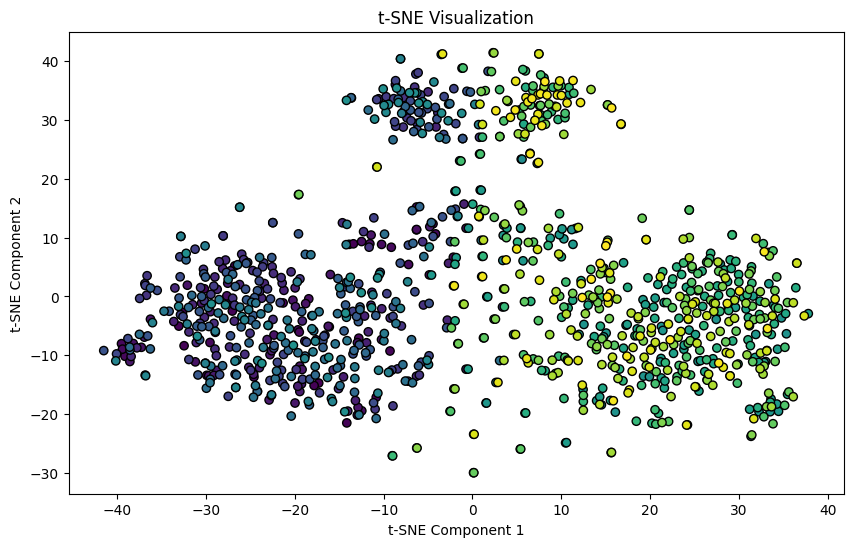

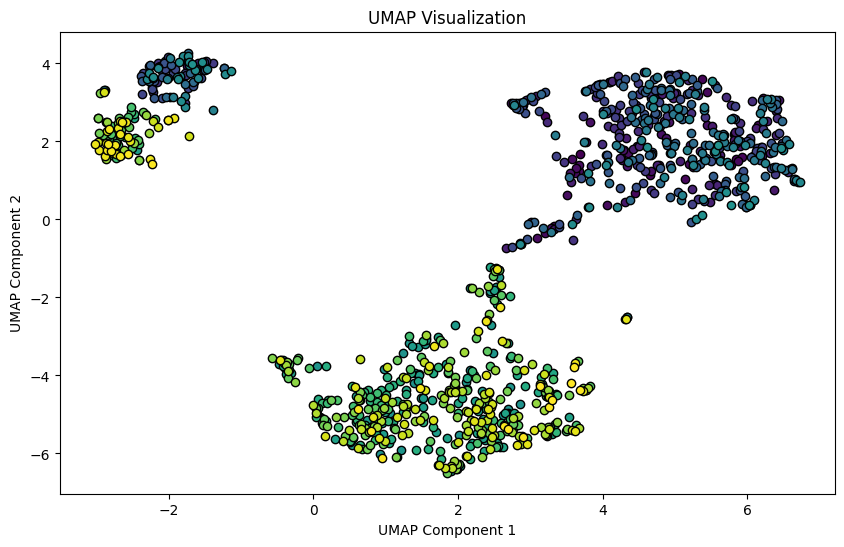

In [96]:
import umap
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.base import BaseEstimator, TransformerMixin

# Assuming df1 has LN_IC50 values
df4 = df
df4['LN_IC50'] = df1['LN_IC50']

# Define different colors for t-SNE
tsne_colors = plt.cm.viridis(np.linspace(0, 1, len(df4['LN_IC50'].unique())))
tsne_color_dict = dict(zip(sorted(df4['LN_IC50'].unique()), tsne_colors))

# Separate features and target variable for t-SNE
X_tsne = df4.drop('LN_IC50', axis=1)
y_tsne = df4['LN_IC50']

# Convert y_tsne to integers for using as indices
y_tsne_int = y_tsne.astype(int)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne_transformed = tsne.fit_transform(X_tsne)

# Visualize the t-SNE-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne_transformed[:, 0], X_tsne_transformed[:, 1], c=[tsne_color_dict[label] for label in y_tsne], marker='o', edgecolors='k')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Define different colors for UMAP
umap_colors = plt.cm.viridis(np.linspace(0, 1, len(df4['LN_IC50'].unique())))
umap_color_dict = dict(zip(sorted(df4['LN_IC50'].unique()), umap_colors))

# Separate features and target variable for UMAP
X_umap = df4.drop('LN_IC50', axis=1)
y_umap = df4['LN_IC50']

# Use UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap_transformed = umap_model.fit_transform(X_umap)

# Visualize the UMAP-transformed data without legend
plt.figure(figsize=(10, 6))
for class_label in sorted(y_umap.unique()):
    class_indices = (y_umap == class_label)
    plt.scatter(X_umap_transformed[class_indices, 0], X_umap_transformed[class_indices, 1],
                c=[umap_color_dict[class_label]], marker='o', edgecolors='k')

plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


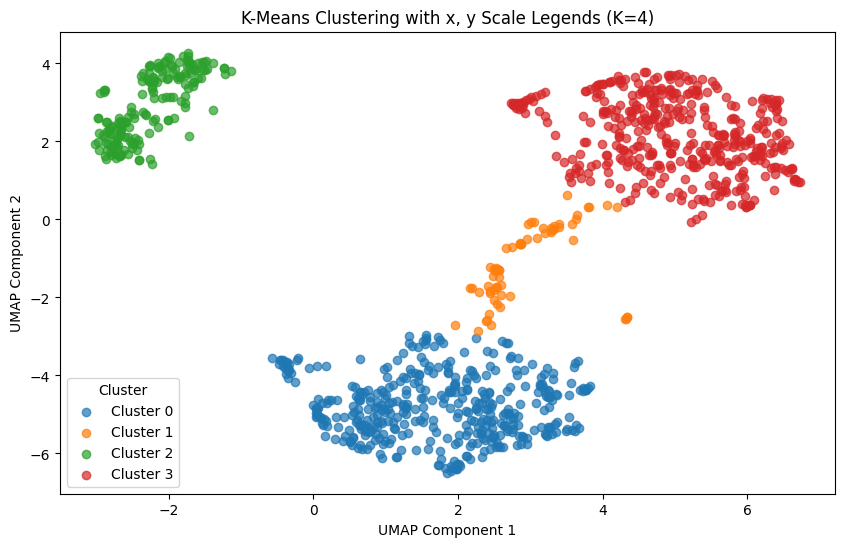

In [113]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_umap_transformed is your UMAP-transformed data

# Set the number of clusters (K) to 4
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_umap_transformed)

# Visualize the clustered data with x, y scale legends
plt.figure(figsize=(10, 6))
for cluster_label in range(k):
    cluster_indices = (cluster_labels == cluster_label)
    plt.scatter(X_umap_transformed[cluster_indices, 0], X_umap_transformed[cluster_indices, 1],
                label=f'Cluster {cluster_label}', alpha=0.7)

df4['newcategory'] = cluster_labels
plt.title('K-Means Clustering with x, y Scale Legends (K=4)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_umap_transformed is your UMAP-transformed data
# Assuming optimal_k is the optimal number of clusters obtained

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df4[' '] = kmeans.fit_predict(X_umap_transformed)

# Create new columns in df4 for each cluster
for cluster_label in range(optimal_k):
    cluster_indices = (df4['Cluster'] == cluster_label)
    df4[f'Cluster_{cluster_label}_UMAP_1'] = np.nan
    df4[f'Cluster_{cluster_label}_UMAP_2'] = np.nan
    df4.loc[cluster_indices, f'Cluster_{cluster_label}_UMAP_1'] = X_umap_transformed[cluster_indices, 0]
    df4.loc[cluster_indices, f'Cluster_{cluster_label}_UMAP_2'] = X_umap_transformed[cluster_indices, 1]

# Visualize the clustered data with x, y scale legends
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_k):
    cluster_indices = (df4['Cluster'] == cluster_label)
    plt.scatter(X_umap_transformed[cluster_indices, 0], X_umap_transformed[cluster_indices, 1],
                label=f'Cluster {cluster_label}', alpha=0.7)

plt.title('K-Means Clustering with x, y Scale Legends')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()


In [107]:
df['Location'] = cluster_labels
df.to_csv('IGFRlocated.csv',index=False)

In [26]:
df['Location'].unique()

array([2, 1, 0], dtype=int64)

# Optimal clustering value of K

In [ ]:
!pip install yellowbrick

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the Elbow Method to find the optimal K
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_scaled)
visualizer.show()


In [ ]:
!pip install gap-stat

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

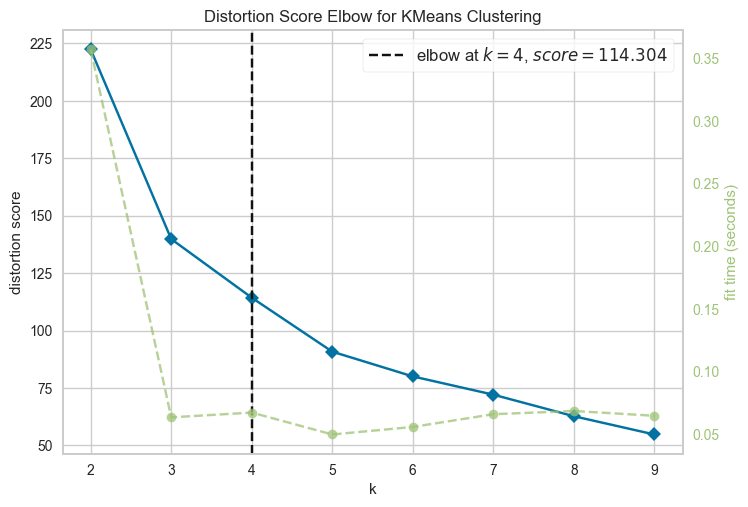

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

Optimal K using Elbow Method: 4 clusters
Optimal K using Silhouette Score: 2 clusters
Optimal K using Gap Statistics: 7 clusters
Optimal K using Elbow Method: 4 clusters
Optimal K using Silhouette Score: 2 clusters
Optimal K using Gap Statistics: 7 clusters


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from gap_statistic import OptimalK
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Load a sample dataset (Iris dataset)
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Elbow Method using Yellowbrick
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_scaled)
visualizer.show()
optimal_k_elbow = visualizer.elbow_value_

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Optimal K using Silhouette Score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

# Gap Statistics
optimalK = OptimalK(parallel_backend="joblib")  # Use joblib for parallel processing
optimal_k_gap = optimalK(X_scaled, cluster_array=range(1, 11))

# Print the results
print(f'Optimal K using Elbow Method: {optimal_k_elbow} clusters')
print(f'Optimal K using Silhouette Score: {optimal_k_silhouette} clusters')
print(f'Optimal K using Gap Statistics: {optimal_k_gap} clusters')

# Print the results
print(f'Optimal K using Elbow Method: {optimal_k_elbow} clusters')
print(f'Optimal K using Silhouette Score: {optimal_k_silhouette} clusters')
print(f'Optimal K using Gap Statistics: {optimal_k_gap} clusters')


# SHAP and LIME

In [ ]:
!pip install SHAP

In [165]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

explainer = shap.Explainer(XGBModel)
shap_values = explainer.shap_values(X_test)

[12:57:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


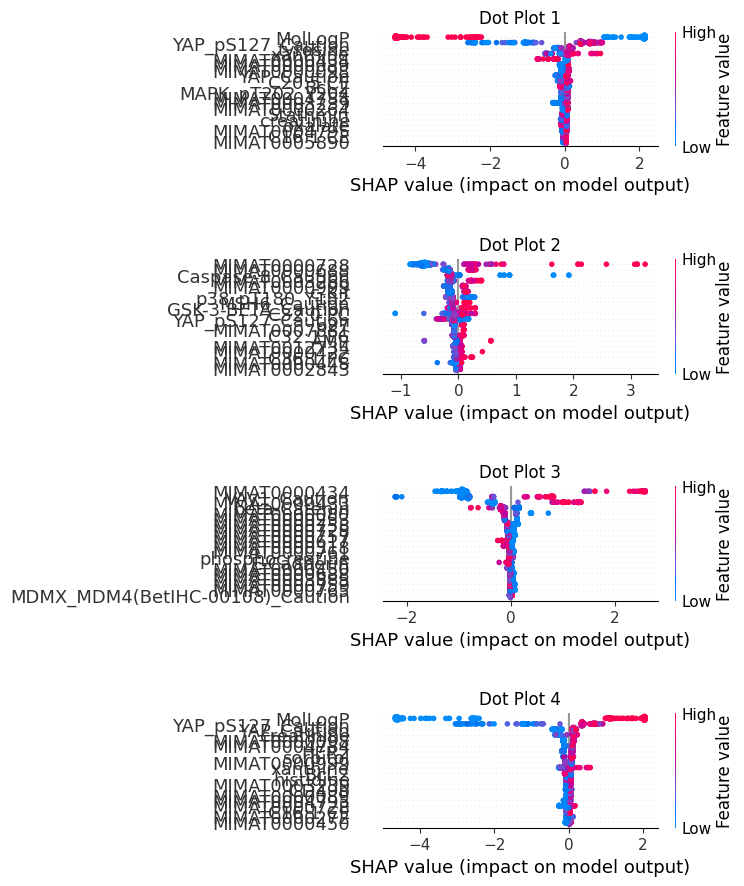

In [189]:
import matplotlib.pyplot as plt

# Display each plot in a separate row
plt.figure(figsize=(8, 20))

# Plot for dot plot 1
plt.subplot(4, 1, 1)
shap.summary_plot(shap_values[0], X_test, plot_type='dot', show=False)
plt.title('Dot Plot 1')

# Plot for dot plot 2
plt.subplot(4, 1, 2)
shap.summary_plot(shap_values[1], X_test, plot_type='dot', show=False)
plt.title('Dot Plot 2')

# Plot for dot plot 3
plt.subplot(4, 1, 3)
shap.summary_plot(shap_values[2], X_test, plot_type='dot', show=False)
plt.title('Dot Plot 3')

# Plot for dot plot 4
plt.subplot(4, 1, 4)
shap.summary_plot(shap_values[3], X_test, plot_type='dot', show=False)
plt.title('Dot Plot 4')

plt.tight_layout(pad=3.0)
plt.show()


Text(0.5, 1.0, 'Bee Swarm Plot')

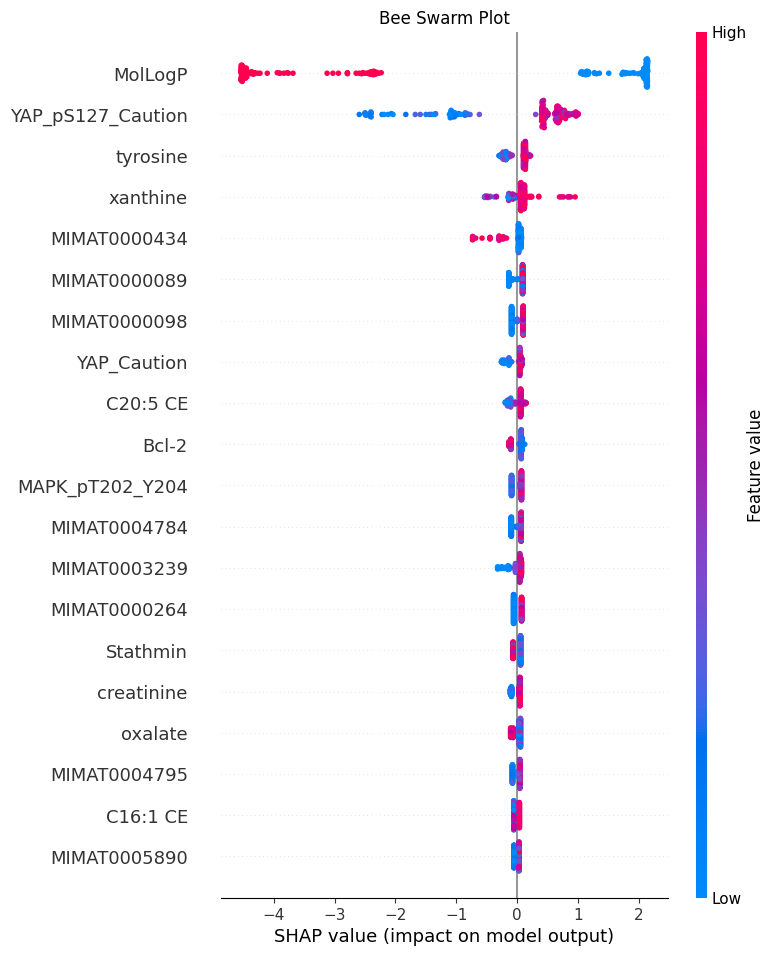

In [205]:
shap.summary_plot(shap_values[0], X_test, plot_type='dot', show=False)
plt.title('Bee Swarm Plot')

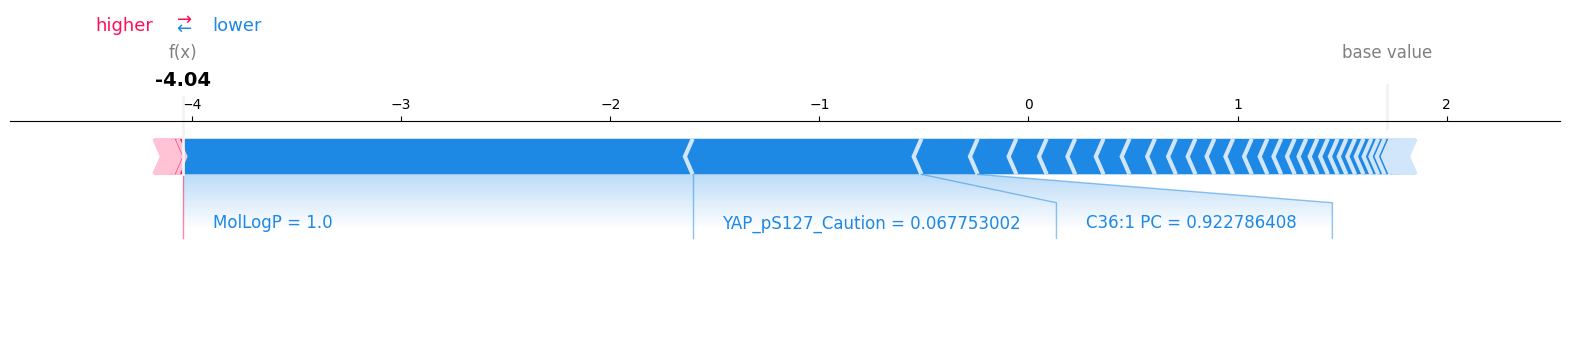

In [206]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

In [ ]:
X_test

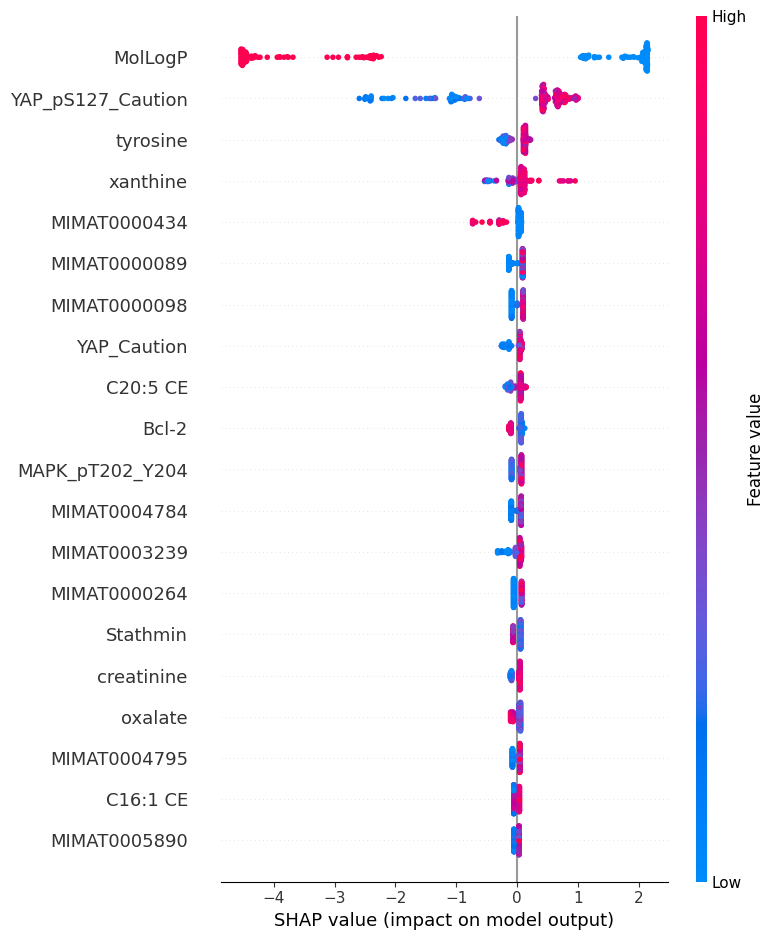

In [218]:
shap.summary_plot(shap_values[0], X_test)

In [219]:
# Convert SHAP values to a DataFrame
shap_summary_df = pd.DataFrame(shap_values[0], columns=X_test.columns)

# Display the summary statistics
summary_stats = shap_summary_df.describe()
print(summary_stats)

       H3K4me0  H3K4me1     H3K4me2  H3K4ac1  H3K9me0K14ac0  H3K9me1K14ac0  \
count    215.0    215.0  215.000000    215.0          215.0          215.0   
mean       0.0      0.0   -0.000076      0.0            0.0            0.0   
std        0.0      0.0    0.006978      0.0            0.0            0.0   
min        0.0      0.0   -0.057955      0.0            0.0            0.0   
25%        0.0      0.0    0.000382      0.0            0.0            0.0   
50%        0.0      0.0    0.000531      0.0            0.0            0.0   
75%        0.0      0.0    0.001521      0.0            0.0            0.0   
max        0.0      0.0    0.001521      0.0            0.0            0.0   

       H3K9me2K14ac0  H3K9me3K14ac0  H3K9ac1K14ac0  H3K9me0K14ac1  ...  \
count          215.0          215.0          215.0          215.0  ...   
mean             0.0            0.0            0.0            0.0  ...   
std              0.0            0.0            0.0            0.0  ...   
m